In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Load train and test data
data = pd.read_csv('data.csv')
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)
train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)


## Les tests pour la data initiale

In [4]:
ts_data=train_data["total_demand(mw)"]

In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dftest[1] < 0.05:
        print("=> La série est stationnaire selon le test ADF (p-value < 0.05).\n")
    else:
        print("=> La série n'est PAS stationnaire selon le test ADF (p-value >= 0.05).\n")

def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)
    
    if kpsstest[1] < 0.05:
        print("=> La série n'est PAS stationnaire selon le test KPSS (p-value < 0.05).\n")
    else:
        print("=> La série est stationnaire selon le test KPSS (p-value >= 0.05).\n")

def pp_test(timeseries):
    print('Results of PP Test:')
    pptest = adfuller(timeseries, regression='ct', autolag='AIC')
    dfoutput = pd.Series(pptest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in pptest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if pptest[1] < 0.05:
        print("=> La série est stationnaire selon le test PP (p-value < 0.05).\n")
    else:
        print("=> La série n'est PAS stationnaire selon le test PP (p-value >= 0.05).\n")
adf_test(ts_data)
kpss_test(ts_data)
pp_test(ts_data)

Results of Dickey-Fuller Test:
Test Statistic                   -2.806991
p-value                           0.057282
#Lags Used                       23.000000
Number of Observations Used    1491.000000
Critical Value (1%)              -3.434743
Critical Value (5%)              -2.863480
Critical Value (10%)             -2.567803
dtype: float64
=> La série n'est PAS stationnaire selon le test ADF (p-value >= 0.05).

Results of KPSS Test:
Test Statistic            0.306275
p-value                   0.100000
#Lags Used               25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                   -2.872973
p-value                           0.171433
#Lags Used                       23.000000
Number of Observations Used    1491.000000
Critical Value (1%)              -3.96

C:\Users\Idea\AppData\Local\Temp\ipykernel_1424\3464870497.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [6]:
# Différencier la série une fois
ts_data_diff = ts_data.diff().dropna()

# Effectuer le test ADF sur la série différenciée
adf_test(ts_data_diff)

Results of Dickey-Fuller Test:
Test Statistic                -9.194083e+00
p-value                        2.085345e-15
#Lags Used                     2.200000e+01
Number of Observations Used    1.491000e+03
Critical Value (1%)           -3.434743e+00
Critical Value (5%)           -2.863480e+00
Critical Value (10%)          -2.567803e+00
dtype: float64
=> La série est stationnaire selon le test ADF (p-value < 0.05).



## les tests pour la serie différencié

In [7]:
ts_data=ts_data_diff
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dftest[1] < 0.05:
        print("=> La série est stationnaire selon le test ADF (p-value < 0.05).\n")
    else:
        print("=> La série n'est PAS stationnaire selon le test ADF (p-value >= 0.05).\n")

def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)
    
    if kpsstest[1] < 0.05:
        print("=> La série n'est PAS stationnaire selon le test KPSS (p-value < 0.05).\n")
    else:
        print("=> La série est stationnaire selon le test KPSS (p-value >= 0.05).\n")

def pp_test(timeseries):
    print('Results of PP Test:')
    pptest = adfuller(timeseries, regression='ct', autolag='AIC')
    dfoutput = pd.Series(pptest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in pptest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if pptest[1] < 0.05:
        print("=> La série est stationnaire selon le test PP (p-value < 0.05).\n")
    else:
        print("=> La série n'est PAS stationnaire selon le test PP (p-value >= 0.05).\n")
adf_test(ts_data)
kpss_test(ts_data)
pp_test(ts_data)

Results of Dickey-Fuller Test:
Test Statistic                -9.194083e+00
p-value                        2.085345e-15
#Lags Used                     2.200000e+01
Number of Observations Used    1.491000e+03
Critical Value (1%)           -3.434743e+00
Critical Value (5%)           -2.863480e+00
Critical Value (10%)          -2.567803e+00
dtype: float64
=> La série est stationnaire selon le test ADF (p-value < 0.05).

Results of KPSS Test:
Test Statistic             0.136847
p-value                    0.100000
#Lags Used               290.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                -9.191650e+00
p-value                        1.344408e-13
#Lags Used                     2.200000e+01
Number of Observations Used    1.491000e+03
Critical Value (1%)        

C:\Users\Idea\AppData\Local\Temp\ipykernel_1424\3552742558.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


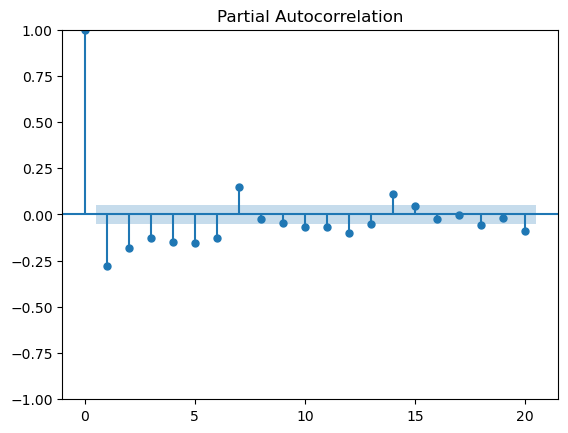

In [8]:
plot_pacf(ts_data_diff, lags=20)
plt.show()

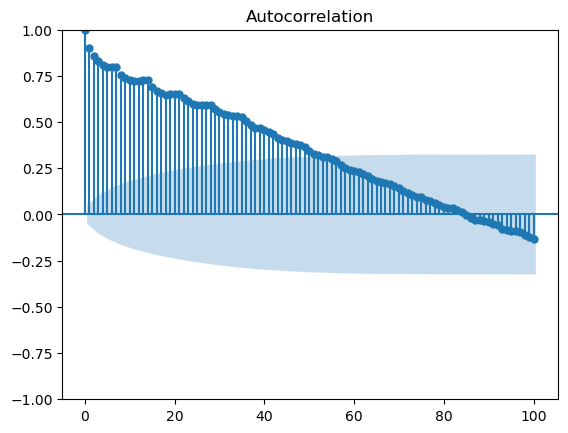

In [9]:
plot_acf(train_data['total_demand(mw)'], lags=100)
plt.show()

In [10]:
# Filter the dataset to include only the last 365 days
train_data_last_730_days = train_data.iloc[-730:]

# Display the minimized dataset
train_data_last_730_days.head()

,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
date,,,,,,,,,,
2020-03-20,31.68,18.55,25.115,100.92,3.55,1.01,2.280,0.45,9147.0,9727.0
2020-03-21,32.83,20.74,26.785,100.98,3.56,0.42,1.990,0.06,9998.0,10529.0
2020-03-22,29.89,21.15,25.520,101.13,3.64,0.55,2.095,14.61,9539.0,10186.0
2020-03-23,30.36,18.30,24.330,101.07,4.68,0.31,2.495,0.26,9629.0,10093.0
2020-03-24,31.46,20.16,25.810,100.90,2.07,1.14,1.605,0.64,9812.0,10264.0


In [11]:
# Fit the SARIMA model
sarima_model = SARIMAX(train_data_last_730_days['total_demand(mw)'], order=(2, 0, 0), seasonal_order=(0, 1, 0, 365))
sarima_model_fit = sarima_model.fit()

# Print the summary of the SARIMA model
print(sarima_model_fit.summary())

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                    total_demand(mw)   No. Observations:                  730
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 365)   Log Likelihood               -3050.079
Date:                             Mon, 21 Apr 2025   AIC                           6106.158
Time:                                     21:45:50   BIC                           6117.858
Sample:                                          0   HQIC                          6110.808
                                             - 730                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6212      0.038     16.464      0.000       0.547       0.695
ar.L2          0.1697      

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


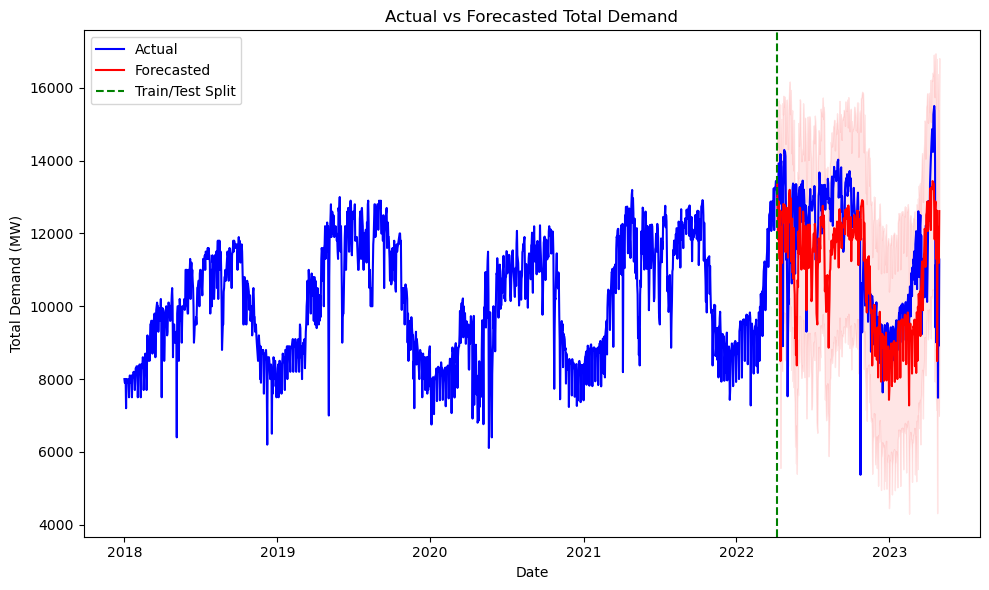

In [12]:
# Get the forecast for the test period
sarima_test_forecast = sarima_model_fit.get_forecast(steps=len(test_data))
forecast_values_1 = sarima_test_forecast.predicted_mean

# Get confidence intervals if needed
forecast_ci = sarima_test_forecast.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the entire actual data (train + test)
plt.plot(data.index, data['total_demand(mw)'], label='Actual', color='blue')

# Plot the forecasted values for the test period
# You need to use the test data's index for proper alignment
plt.plot(test_data.index, forecast_values_1, label='Forecasted', color='red')

# Add confidence intervals if desired
plt.fill_between(test_data.index, 
                 forecast_ci.iloc[:, 0],  # Lower bound
                 forecast_ci.iloc[:, 1],  # Upper bound
                 color='red', alpha=0.1)

# Add a vertical line to mark the train/test split
train_end = train_data.index[-1]
plt.axvline(x=train_end, color='green', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('Total Demand (MW)')
plt.title('Actual vs Forecasted Total Demand')
plt.legend()
plt.tight_layout()
plt.show()

2022-04-08 00:00:00   NaN
2022-04-09 00:00:00   NaN
2022-04-10 00:00:00   NaN
2022-04-11 00:00:00   NaN
2022-04-12 00:00:00   NaN
dtype: float64


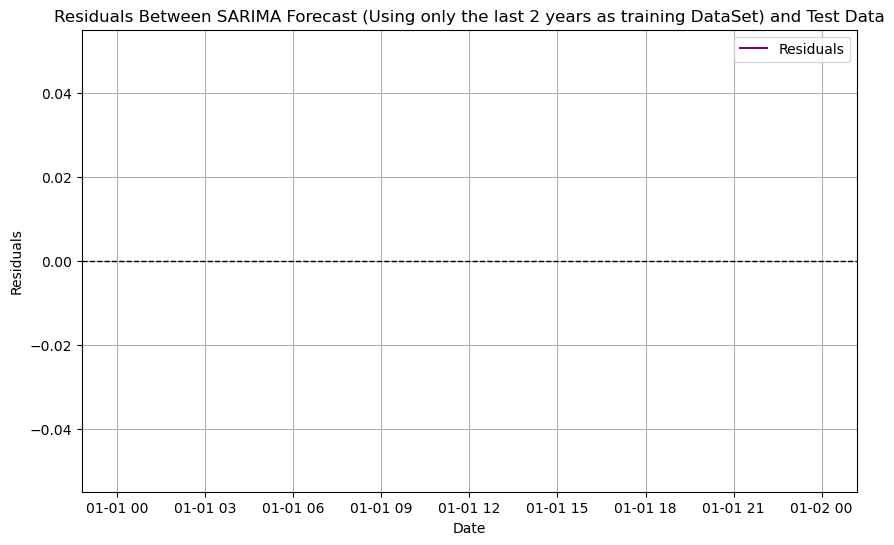

In [13]:
# Calculer les résiduels
residuals = test_data['total_demand(mw)'] - forecast_values_1

# Afficher les premières lignes des résiduels
print(residuals.head())

# Tracer les résiduels
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Between SARIMA Forecast (Using only the last 2 years as training DataSet) and Test Data')
plt.legend()
plt.grid()
plt.show()